In [1]:
import pandas as pd
import numpy as np
%pylab notebook
import seaborn

Populating the interactive namespace from numpy and matplotlib


# Tablas Pivote

Es muy común la agrupación de información en formato 'stack' donde tenemos filas de datos que demuestran una correlación entre dos sets de valores.

Las tablas pivote son una forma de re-ordenar los datos en una estructura tabular donde podemos agrupar los valores convirtiendo las tuplas entre valores numéricos.

En este caso de ejemplo, crearemos un dataset de prueba con la diversidad de restaurantes en varias ciudades centroamericanas. En esta vamos a comenzar a trabajar con dos columnas, una donde describe cada ciudad y la otra con la variedad de cocina disponible en cada una.

In [2]:
data_restaurantes = {
    'ciudades': ['Guatemala','Guatemala','Guatemala','Guatemala','Guatemala','Guatemala','San José','San José','San José','San José','San José','San Salvador','San Salvador','San Salvador'],
    'restaurantes': ['Chapina','Chapina','China','Thai','Italiana','Chapina','Italiana','China','Tica','Chapina','Tica','Tica','Italiana','China']
}

restaurantes_dataframe_pares = pd.DataFrame(data_restaurantes)
restaurantes_dataframe_pares

,ciudades,restaurantes
0,Guatemala,Chapina
1,Guatemala,Chapina
2,Guatemala,China
3,Guatemala,Thai
4,Guatemala,Italiana
5,Guatemala,Chapina
6,San José,Italiana
7,San José,China
8,San José,Tica
9,San José,Chapina


Podemos ver entonces este listado de valores, tupla por tupla. Que tal si queremos contar la presencia de cada tipo de cocina en cada region. Probemos utilizando entonces el comando [DataFrame.pivot_table](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pivot.html) de Pandas.

Este pide unos cuantos argumentos que podemos ver en la documentación. Unos cuantos son obvios, como el definir las filas y columnas que esperamos de la tabla objetivo.
Sin embargo, lo más notable es que ya que los tipos de datos que estamos utilizando no son numéricos, es necesario que definamos una funcion de agrupación que nos permita contar la cantidad de instancias de cada combinación.

In [3]:
def funcion_agrupacion(elemento):
    return True

agrupacion_culinaria = restaurantes_dataframe_pares.pivot_table(
    index=["ciudades"],
    columns="restaurantes",
    aggfunc=funcion_agrupacion,
    fill_value=False)
agrupacion_culinaria

restaurantes,Chapina,China,Italiana,Thai,Tica
ciudades,,,,,
Guatemala,True,True,True,True,False
San José,True,True,True,False,True
San Salvador,False,True,True,False,True


Hmm, esto ya se ve con la forma que queremos, sin embargo solo nos muestra la presencia o ausencia de algun tipo de cocina. Esto es facil de explicar ya que definimos nuestra función de agrupación como retornar True si existe presencia a retornar False si No. Que tal si hacemos una mejor función de agrupación.

In [4]:
def funcion_agrupacion(elemento):
    '''Contemos cuantas instancias de cada tupla existen.'''
    ## El comando len(iterable) cuenta la cantidad de elementos que tiene el objeto iterable que le pasemos
    ## los elementos iterables pueden ser listas normales, Series de NumPy o Pandas, o diccionarios y otros tipos de datos.
    return len(elemento)
agrupacion_culinaria = restaurantes_dataframe_pares.pivot_table(index=["ciudades"], columns="restaurantes", aggfunc=lambda x: funcion_agrupacion(x), fill_value=0)
agrupacion_culinaria

restaurantes,Chapina,China,Italiana,Thai,Tica
ciudades,,,,,
Guatemala,3,1,1,1,0
San José,1,1,1,0,2
San Salvador,0,1,1,0,1


¡Genial! Ahora ya tenemos agrupadas estas de una forma coherente. Ahora ya podemos seguir manipulando y editando estos datos.
Pero que tal si hacemos un poco mas simple esta llamada, al final nuestra funcion de agrupacion lo unico que hace es contar la cantidad de tuplas sobre las cuales aplica el pivote. ¿Que tal si lo hacemos un poco más simple?

In [5]:
agrupacion_culinaria = restaurantes_dataframe_pares.pivot_table(
    index=["ciudades"], 
    columns="restaurantes", 
    aggfunc=len, ## Enviamos directamente la función de agrupación.
    fill_value=0)

In [6]:
agrupacion_culinaria.query('ciudades == ["Guatemala"]')

restaurantes,Chapina,China,Italiana,Thai,Tica
ciudades,,,,,
Guatemala,3,1,1,1,0


In [7]:
## Con el argumento Margins, Panda calcula los valores sumados de los totales por agrupación.
agrupacion_culinaria_m = restaurantes_dataframe_pares.pivot_table(
    index=["ciudades"],
    columns="restaurantes",
    aggfunc=len,
    fill_value=0,
    margins=True)
agrupacion_culinaria_m

restaurantes,Chapina,China,Italiana,Thai,Tica,All
ciudades,,,,,,
Guatemala,3.0,1.0,1.0,1.0,0.0,6.0
San José,1.0,1.0,1.0,0.0,2.0,5.0
San Salvador,0.0,1.0,1.0,0.0,1.0,3.0
All,4.0,3.0,3.0,1.0,3.0,14.0


## Múltiples Valores y Múltiples Indices
¿Que tal si tenemos datos que tienen una estructura Jerárquica inherente? Podemos utilizar la mísma forma de multi indexación que vimos en el seminario pasado, lo importante es que a la hora de la definición del índice, Pandas es capaz de manipularlos e inteligentemente ordenar los niveles acorde.

In [8]:
data_restaurantes_estrellas = {
    'ciudades': ['Guatemala','Guatemala','Guatemala','Guatemala','Guatemala','Guatemala','San José','San José','San José','San José','San José','San Salvador','San Salvador','San Salvador'],
    'restaurantes': ['Chapina','Chapina','China','Thai','Italiana','Chapina','Italiana','China','Tica','Chapina','Tica','Tica','Italiana','China'],
    'estrellas': [5,3,3,5,3,1,2,2,4,4,4,3,2,3]
}

restaurantes_dataframe_estrellas = pd.DataFrame(data_restaurantes_estrellas)

In [9]:
agrupacion_culinaria_promedio_estrellas = restaurantes_dataframe_estrellas.pivot_table(
    index=["ciudades"], 
    values=["restaurantes", "estrellas"], 
    aggfunc={"restaurantes":len,"estrellas":np.mean},
    fill_value=0)
agrupacion_culinaria_promedio_estrellas

,estrellas,restaurantes
ciudades,,
Guatemala,3.000000,6
San José,3.200000,5
San Salvador,2.666667,3


Que tal si queremos ver cuantas estrellas en promedio tienen los restaurantes?

In [10]:
agrupacion_culinaria_por_estrellas = restaurantes_dataframe_estrellas.pivot_table(
    index=["ciudades"], 
    values=["estrellas"], 
    columns=["estrellas"],
    aggfunc={"estrellas":np.mean},
    fill_value=0)
agrupacion_culinaria_por_estrellas

estrellas            
estrellas            1  2  3  4  5
ciudades                          
Guatemala            1  2  3  4  5
San José             0  2  0  4  0
San Salvador         0  2  3  0  0

Hmm... esto no es muy util, solo nos dice tautologicamente, que los restaurantes de 'n' estrellas tienen 'n' estrellas. Pueden ver porque el error?

In [11]:
agrupacion_culinaria_por_estrellas = restaurantes_dataframe_estrellas.pivot_table(
    index=["ciudades"], 
    values=["estrellas"], 
    columns=["restaurantes"],
    aggfunc={"estrellas":np.mean},
    fill_value=0,
    margins=True)
agrupacion_culinaria_por_estrellas

estrellas                                             
restaurantes   Chapina     China  Italiana Thai      Tica       All
ciudades                                                           
Guatemala     2.333333  3.000000  3.000000  5.0  0.000000  3.000000
San José      4.000000  2.000000  2.000000  0.0  4.000000  3.200000
San Salvador  0.000000  3.000000  2.000000  0.0  3.000000  2.666667
All           2.750000  2.666667  2.333333  5.0  3.666667  3.000000

<IPython.core.display.Javascript object>


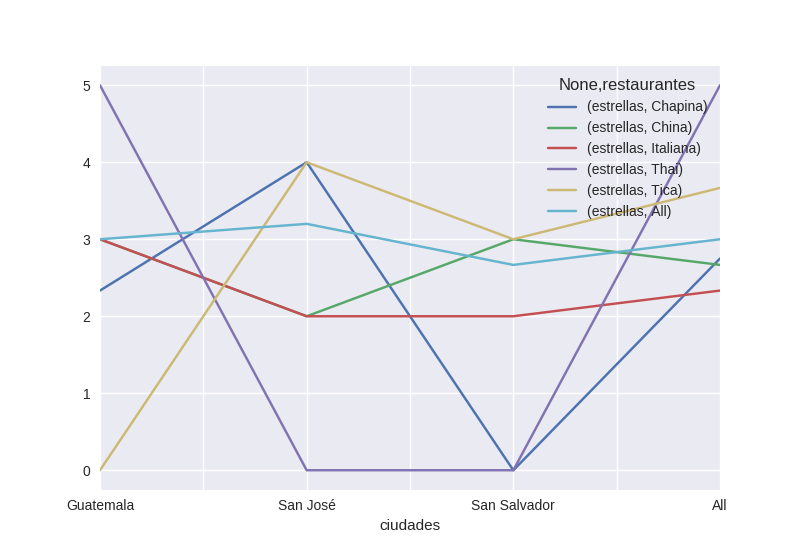

In [12]:
agrupacion_culinaria_por_estrellas.plot()